<a href="https://colab.research.google.com/github/martuscellifaria/Coursera/blob/main/Lasso_Smokers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV, LassoCV, LassoLarsIC

#2. Load dataset

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Course ML/tree_addhealth.csv")

# 3. Uppercase all data column names

In [ ]:
data.columns = map(str.upper, data.columns)

#4. Manage the data

In [ ]:
data_clean = data.dropna()
recode1 = {1:1, 2:0}
data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#5. Select predictors and target

In [ ]:
predvar= data_clean[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

target = data_clean.SCHCONN1

#6. Standardize predictors to have mean = 0 and sd = 1

In [ ]:
predictors=predvar.copy()
from sklearn import preprocessing
predictors['MALE']=preprocessing.scale(predictors['MALE'].astype('float64'))
predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['GPA1']=preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))

#7. Split data in training and test

In [ ]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

#8. Specify the Lasso regression model

In [ ]:
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

#9. Print variable names and regression coefficients

In [ ]:
dict(zip(predictors.columns, model.coef_))

{'AGE': 0.21734102065276764,
 'ALCEVR1': -0.3249964960966412,
 'ALCPROBS1': 0.0,
 'ASIAN': 0.18869030694622835,
 'BLACK': -0.6936478686386832,
 'CIGAVAIL': -0.1098387918895105,
 'COCEVER1': -0.20000921703104865,
 'DEP1': -0.8541784447568668,
 'DEVIANT1': -0.41808246027792695,
 'ESTEEM1': 1.0974098143740492,
 'EXPEL1': -0.07382899854862195,
 'FAMCONCT': 0.5152729478743225,
 'GPA1': 0.6655764176697644,
 'HISPANIC': 0.20300474500011134,
 'INHEVER1': 0.0,
 'MALE': -0.2150869378356554,
 'MAREVER1': -0.15980377488873274,
 'NAMERICAN': -0.10784573616426557,
 'PARACTV': 0.29991192982913406,
 'PARPRES': 0.0,
 'PASSIST': 0.0,
 'VIOL1': -0.6392671702279838,
 'WHITE': 0.0}

#10. Plot coefficient progression

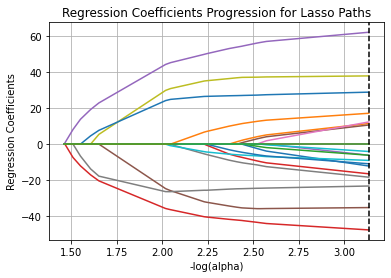

In [ ]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.grid(which='major')
plt.grid(which='minor')

#11. Plot mean square error for each fold

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


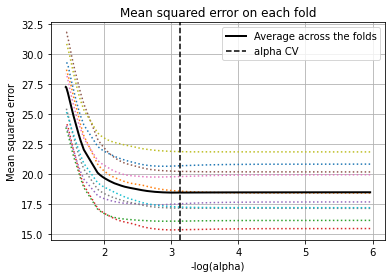

In [ ]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.grid(which='major')
plt.grid(which='minor')

#12. MSE from training and test data

In [21]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
18.148572664081474
test data MSE
17.292517427169482


#13. R-Square from training and test data

In [22]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.3336111369269189
test data R-square
0.3100111341600077
